# CNN Trainig Templete
## Based on Tensorlfow - CNN MNIST example
https://github.com/tensorflow/tensorflow/blob/r1.6/tensorflow/examples/tutorials/layers/cnn_mnist.py

## 필요한 library 호출

In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import random

import json

tf.logging.set_verbosity(tf.logging.INFO)


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_txt = open('./data_split/data_dir_dict_0614.txt', 'r')
data_json = data_txt.read()
tr_data_dir = json.loads(data_json)

In [3]:
# Data info.

width = 640
height = 480
channel = 1


# resize
r_w = 512
r_h = 512

total_pix = r_w * r_h * channel

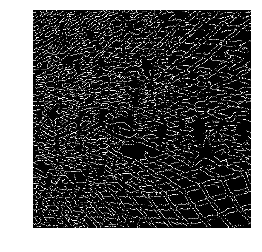

(262144,)


In [4]:
img = cv2.imread(tr_data_dir['train'][0][0], -1)
img2 = cv2.resize(img, (r_w, r_h), interpolation=cv2.INTER_CUBIC)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))
plt.show()
test = img2.flatten()
print(test.shape)

In [5]:
tr_data = np.zeros((len(tr_data_dir['train']), total_pix), dtype=np.float32)
tr_label = np.zeros((len(tr_data_dir['train']), 1), dtype=np.int32)

for i in range(len(tr_data_dir['train'])):
    img = cv2.imread(tr_data_dir['train'][i][0], -1)
    img2 = cv2.resize(img, (r_w, r_h), interpolation=cv2.INTER_CUBIC)
    tr_data[i,:] = img2.flatten()
    tr_label[i] = tr_data_dir['train'][i][1]

In [6]:
ev_data = np.zeros((len(tr_data_dir['test']), total_pix), dtype=np.float32)
ev_label = np.zeros((len(tr_data_dir['test']), 1), dtype=np.int32)

for i in range(len(tr_data_dir['test'])):
    img = cv2.imread(tr_data_dir['test'][i][0], -1)
    img2 = cv2.resize(img, (r_w, r_h), interpolation=cv2.INTER_CUBIC)
    ev_data[i,:] = img2.flatten()
    ev_label[i] = tr_data_dir['test'][i][1]

In [7]:
def cnn_model_fn(features, labels, mode):
    
    """Model function for CNN."""
    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, height, width, channels]
    # Our Fishing net image size is 640x480 and 3-channel (RGB)
    input_layer = tf.reshape(features["x"], [-1, 512, 512, 1])

    # Convolutional Layer #1
    # Computes 48 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 480, 640, 3]
    # Output Tensor Shape: [batch_size, 480, 640, 48]
    conv1 = tf.layers.conv2d(
        
        inputs=input_layer,
        filters=48,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu,
        name='conv1')

    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 480, 640, 48]
    # Output Tensor Shape: [batch_size, 240, 320, 48]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2
    # Computes 96 features using a 5x5 filter.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 240, 320, 48]
    # Output Tensor Shape: [batch_size, 240, 320, 96]
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #2
    # Second max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 240, 320, 96]
    # Output Tensor Shape: [batch_size, 120, 160, 96]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    
    
    
    # Input Tensor Shape: [batch_size, 120, 160, 96]
    # Output Tensor Shape: [batch_size, 120, 160, 96]    
    conv3 = tf.layers.conv2d(
        inputs=pool2,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Input Tensor Shape: [batch_size, 120, 160, 96]
    # Output Tensor Shape: [batch_size, 60, 80, 96]
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    
    
    # Input Tensor Shape: [batch_size, 60, 80, 96]
    # Output Tensor Shape: [batch_size, 60, 80, 96]    
    conv4 = tf.layers.conv2d(
        inputs=pool3,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Input Tensor Shape: [batch_size, 60, 80, 96]
    # Output Tensor Shape: [batch_size, 30, 40, 96]
    pool4 = tf.layers.max_pooling2d(inputs=conv4, pool_size=[2, 2], strides=2)
    
    
    
    # Input Tensor Shape: [batch_size, 30, 40, 96]
    # Output Tensor Shape: [batch_size, 30, 40, 96]    
    conv5 = tf.layers.conv2d(
        inputs=pool4,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Input Tensor Shape: [batch_size, 30, 40, 96]
    # Output Tensor Shape: [batch_size, 15, 20, 96]
    pool5 = tf.layers.max_pooling2d(inputs=conv5, pool_size=[2, 2], strides=2)
    
    
    
    
    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 15, 20, 96]
    # Output Tensor Shape: [batch_size, 15 * 20 * 96]
    pool5_flat = tf.contrib.layers.flatten(pool5)

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 15 * 20 * 96]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool5_flat, units=1024, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.5, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 2]
    logits = tf.layers.dense(inputs=dropout, units=2)
    

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    # sparse_softmax_cross_entropy cannot use one-hot encoding
    
    #loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        #optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [8]:
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#session = tf.Session(config=config)

# Create the Estimator
f_dir = "/models/Edge/Train_4/"
net_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir=f_dir)

# Set up logging for predictions
# Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

batch_s = 16
epochs = 10
tr_steps = int(tr_data.shape[0]/batch_s*epochs)
in_steps = 1



# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": tr_data},
    y=tr_label,
    batch_size=batch_s,
    num_epochs=epochs,
    shuffle=False)
net_classifier.train(
    input_fn=train_input_fn,
    steps=tr_steps,
    hooks=[logging_hook])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_model_dir': '/models/Edge/Train_4/', '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4d5406e978>, '_task_id': 0, '_service': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /models/Edge/Train_4/model.ckpt.
INFO:tensorflow:probabilities = [[1.         0

INFO:tensorflow:loss = 0.2620598, step = 701 (22.967 sec)
INFO:tensorflow:probabilities = [[0.03434304 0.965657  ]
 [0.94344383 0.0565562 ]
 [0.00197835 0.9980217 ]
 [0.04199543 0.9580046 ]
 [0.01898901 0.981011  ]
 [0.09926698 0.90073305]
 [0.01814102 0.9818589 ]
 [0.00000047 0.9999995 ]
 [0.9139528  0.08604722]
 [0.00424799 0.995752  ]
 [0.9656542  0.03434578]
 [0.9982692  0.00173082]
 [0.00461143 0.9953885 ]
 [0.9959137  0.00408628]
 [0.00965792 0.990342  ]
 [0.03492953 0.9650705 ]] (11.515 sec)
INFO:tensorflow:global_step/sec: 4.34585
INFO:tensorflow:probabilities = [[0.75559294 0.24440701]
 [0.9999987  0.00000129]
 [0.03266346 0.96733654]
 [0.7690836  0.23091637]
 [0.999551   0.00044895]
 [0.09685601 0.90314394]
 [0.000086   0.99991405]
 [0.00039666 0.99960333]
 [0.9999331  0.00006692]
 [0.97065544 0.0293446 ]
 [0.99979776 0.00020229]
 [0.5846134  0.41538662]
 [0.9997731  0.00022697]
 [0.00014052 0.99985945]
 [0.7435777  0.25642228]
 [0.00600287 0.9939971 ]] (11.496 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 4.26667
INFO:tensorflow:probabilities = [[0.9980652  0.00193481]
 [0.87758106 0.12241892]
 [0.9999801  0.00001997]
 [0.9999496  0.00005046]
 [0.9999944  0.0000056 ]
 [0.00115847 0.9988416 ]
 [0.37844175 0.6215583 ]
 [0.00025289 0.9997471 ]
 [0.99482936 0.00517068]
 [1.         0.        ]
 [0.07060727 0.92939276]
 [0.01144377 0.9885562 ]
 [0.0223194  0.97768056]
 [0.00000876 0.9999913 ]
 [0.9999403  0.0000597 ]
 [0.999997   0.00000298]] (11.901 sec)
INFO:tensorflow:loss = 0.076141566, step = 1601 (23.436 sec)
INFO:tensorflow:probabilities = [[0.2877923  0.7122077 ]
 [0.9430254  0.05697457]
 [0.9999081  0.00009188]
 [0.00960607 0.99039394]
 [0.00056362 0.9994363 ]
 [0.9999993  0.00000069]
 [1.         0.        ]
 [0.9996444  0.00035556]
 [0.9997317  0.00026828]
 [0.99577975 0.00422026]
 [0.9999995  0.00000048]
 [0.01325794 0.9867421 ]
 [0.00000031 0.99999964]
 [0.00031208 0.9996879 ]
 [0.00008187 0.9999181 ]
 [1.         0.        ]] (11.858 sec)
INFO:t

In [9]:

ev_results = np.zeros((len(ev_label), 1))


# Evaluate the model and print results
for i in range(len(ev_label)):
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": ev_data[i:i+1]},
        y=ev_label[i:i+1],
        num_epochs=1,
        shuffle=False)
    eval_results = net_classifier.evaluate(input_fn=eval_input_fn)

    ev_results[i] = eval_results["accuracy"]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:42:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:42:45
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 3.576278e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:42:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:42:46
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:te

INFO:tensorflow:Finished evaluation at 2018-07-03-16:42:52
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:42:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:42:52
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:42:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished e

INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:42:59
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:42:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:00
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:06
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:06
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calli

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:13
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 3.576278e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:13
INFO:tensorflow:S

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:19
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 11.135402
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:20
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 2.3841855e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tenso

INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:26
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 4.7683704e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:27
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 3.576278e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:te

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 6.2344516e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:33
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 2.3841855e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:34
INFO:t

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:40
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.07046676
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:40
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 3.5765874
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorfl

INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:47
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920858e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:47
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:

INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 3.052791
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:54
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 3.5881352e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:43:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:43:54
INFO:tensor

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:00
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.966934e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:01
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:R

INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:07
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:08
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0002244459
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:te

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:14
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 0.74608326
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:15
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Cal

INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:21
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:21
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.007698746
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Fi

INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:28
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.0490363e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:28
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:35
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0001832079
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:35
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 5.960463e-07
INFO:ten

INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:41
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 2.0454137
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:42
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0006387577
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensor

INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:49
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 2.145765e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:49
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:56
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:44:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:44:56
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling mo

INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:03
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:03
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:10
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 7.152555e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:10
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:10
INFO:tensorflow:G

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:17
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:17
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling mo

INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:24
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.110907406
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:24
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:ten

INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:31
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 6.5186324
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:31
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.00051425584
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:32
INFO:tensorflow:Graph was finalized.
INFO:tenso

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:38
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 6.3536536e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:39
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0002217047
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:45
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:46
INFO:tensorflow:S

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:52
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.966934e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:53
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 1.9287999
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensor

INFO:tensorflow:Starting evaluation at 2018-07-03-16:45:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:45:59
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:00
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting e

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.02496772
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:06
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:07
INFO:tensorflow:Sav

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:13
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 8.65422e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:13
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.7881378e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:ten

INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:20
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 8.7972585e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:21
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.00023100091
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:27
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0668725
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:28
INFO:tenso

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:34
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.000759075
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:34
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 1.0697654
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorf

INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:41
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.00095917465
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:42
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:48
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.20633747
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:49
INFO:tensorflow:Sav

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:55
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0019507442
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:46:56
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.00023409964
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:46:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:te

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:02
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:03
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 7.152555e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:03
INFO:tensorflow:G

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:09
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.05193864
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:10
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.072883e-06
INFO:tenso

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:16
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:16
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:23
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.067455575
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:23
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:24
INFO:tensorflow:Gr

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:30
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 3.1828375e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:30
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0005682284
INFO:te

INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:37
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:37
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 8.344647e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:F

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:44
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.7881378e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:44
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:45
INFO:tensorflow:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:51
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.10275113
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:51
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tens

INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:58
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:47:58
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 2.384183e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:47:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:F

INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:05
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.019914566
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:05
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0003392121
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:05
INFO:tensorflow:Graph was finalized.
INFO:tens

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:12
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:12
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 2.3841855e-07
INFO:tensorflow:

INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:19
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:19
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.09628486
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:26
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.5497195e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:26
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0006663963
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:26
INFO:te

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:33
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.5735503e-05
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:33
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:

INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:40
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.15283893
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:40
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Fin

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:47
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 9.655906e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:47
INFO:tensorflow:Saving dict for global step 2280: accuracy = 0.0, global_step = 2280, loss = 7.379143
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:54
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.4305105e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:48:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:48:54
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.6212332e-05
INFO:tensorflow:Calling model_fn.
INFO:t

INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.6689287e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:49:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:49:01
INFO:tensorflow:Saving dict for global step 2280: accuracy = 1.0, global_step = 2280, loss = 1.5497195e-06
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-16:49:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/Edge/Train_4/model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-16:49:01
INFO:t

In [10]:
print(np.mean(ev_results))

0.9135667396061269


In [11]:
fail_idx = np.where(ev_results==0)

In [12]:
for i in range(len(fail_idx[0])):
    new_img = cv2.imread(tr_data_dir['test'][fail_idx[0][i]][0])
    
    save_path = "/models/Edge_fail/T4_fail-%d.png" % i
    cv2.imwrite(save_path, new_img)